# Exploratory Data Analysis
---
The dataset obtained from: https://www.kaggle.com/datasets/bassamkasasbeh1/wsnds/data


## Dependencies and Constants

In [61]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('../..')))

ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), "../.."))
LOGS_DIR = os.path.join(ROOT_DIR, 'logs')

In [43]:
from src.helpers import io
from src.helpers import edaTools

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

## Dataset Preparation

In [35]:
file_path = ROOT_DIR+'\\data\\raw\\WSN-DS.csv'
df = pd.read_csv(file_path)
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


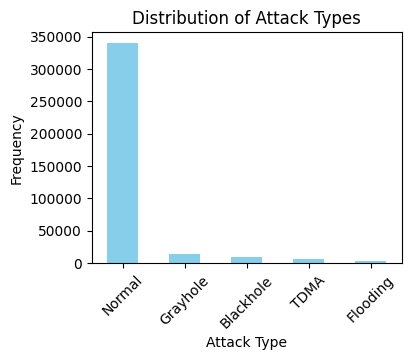

In [41]:
attack_type_counts = df['Attack type'].value_counts()

plt.figure(figsize=(4,3))
attack_type_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')

plt.xticks(rotation=45)
plt.show()

Normal       30000
Grayhole     14596
Blackhole    10049
TDMA          6638
Flooding      3312
Name: Attack type, dtype: int64


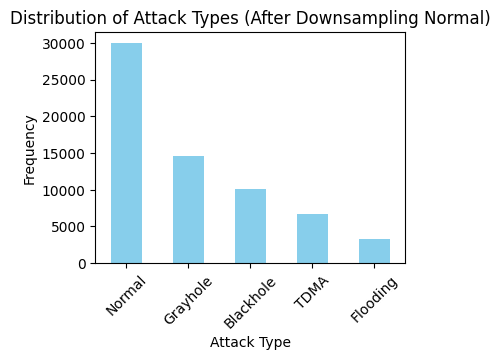

In [42]:
# Down sampling the majority class

normal_class = df[df['Attack type'] == 'Normal']
attack_classes = df[df['Attack type'] != 'Normal']

normal_downsampled = normal_class.sample(n=30000, random_state=42)
df_balanced = pd.concat([normal_downsampled, attack_classes])

df_balanced = df_balanced.sample(frac=1, random_state=22).reset_index(drop=True)

print(df_balanced['Attack type'].value_counts())

attack_type_counts = df_balanced['Attack type'].value_counts()

plt.figure(figsize=(4, 3))
attack_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Attack Types (After Downsampling Normal)')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [44]:
edaTools.basicEDA(df_balanced, '📊')

📊 >> Exploratory Data Analysis Report
📊 >> Missing Values and Percentage


,Missing Values,Percentage (%)
id,0,0.00%
Time,0,0.00%
Is_CH,0,0.00%
who CH,0,0.00%
Dist_To_CH,0,0.00%
ADV_S,0,0.00%
ADV_R,0,0.00%
JOIN_S,0,0.00%
JOIN_R,0,0.00%
SCH_S,0,0.00%


📊 >> Data Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64595 entries, 0 to 64594
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0    id               64595 non-null  int64  
 1    Time             64595 non-null  int64  
 2    Is_CH            64595 non-null  int64  
 3    who CH           64595 non-null  int64  
 4    Dist_To_CH       64595 non-null  float64
 5    ADV_S            64595 non-null  int64  
 6    ADV_R            64595 non-null  int64  
 7    JOIN_S           64595 non-null  int64  
 8    JOIN_R           64595 non-null  int64  
 9    SCH_S            64595 non-null  int64  
 10   SCH_R            64595 non-null  int64  
 11  Rank              64595 non-null  int64  
 12   DATA_S           64595 non-null  int64  
 13   DATA_R           64595 non-null  int64  
 14   Data_Sent_To_BS  64595 non-null  int64  
 15   dist_CH_To_BS    64595 non-null  float64
 16   send_code        6459

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
count,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595.000000,64595
unique,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5
top,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Normal
freq,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,30000
mean,394411.259045,1497.584333,0.542534,394430.170632,11.734533,1.372645,11.518972,0.404010,3.221039,1.601517,0.399056,5.146358,23.018655,131.006316,8.832712,35.342009,1.294899,0.386891,nan
std,432507.668278,1076.871773,0.498191,432520.967849,19.384299,4.721669,9.797227,0.490703,9.441874,6.469979,0.489708,11.875122,37.785260,319.234702,30.977981,58.931780,2.136028,0.773348,nan
min,101000.000000,50.000000,0.000000,101000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
25%,112007.000000,553.000000,0.000000,112006.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000,nan
50%,210050.000000,1203.000000,1.000000,210054.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.069310,nan
75%,508094.000000,2453.000000,1.000000,508100.000000,19.376210,1.000000,25.000000,1.000000,0.000000,0.000000,1.000000,3.000000,36.000000,0.000000,1.000000,86.034460,2.000000,0.237295,nan


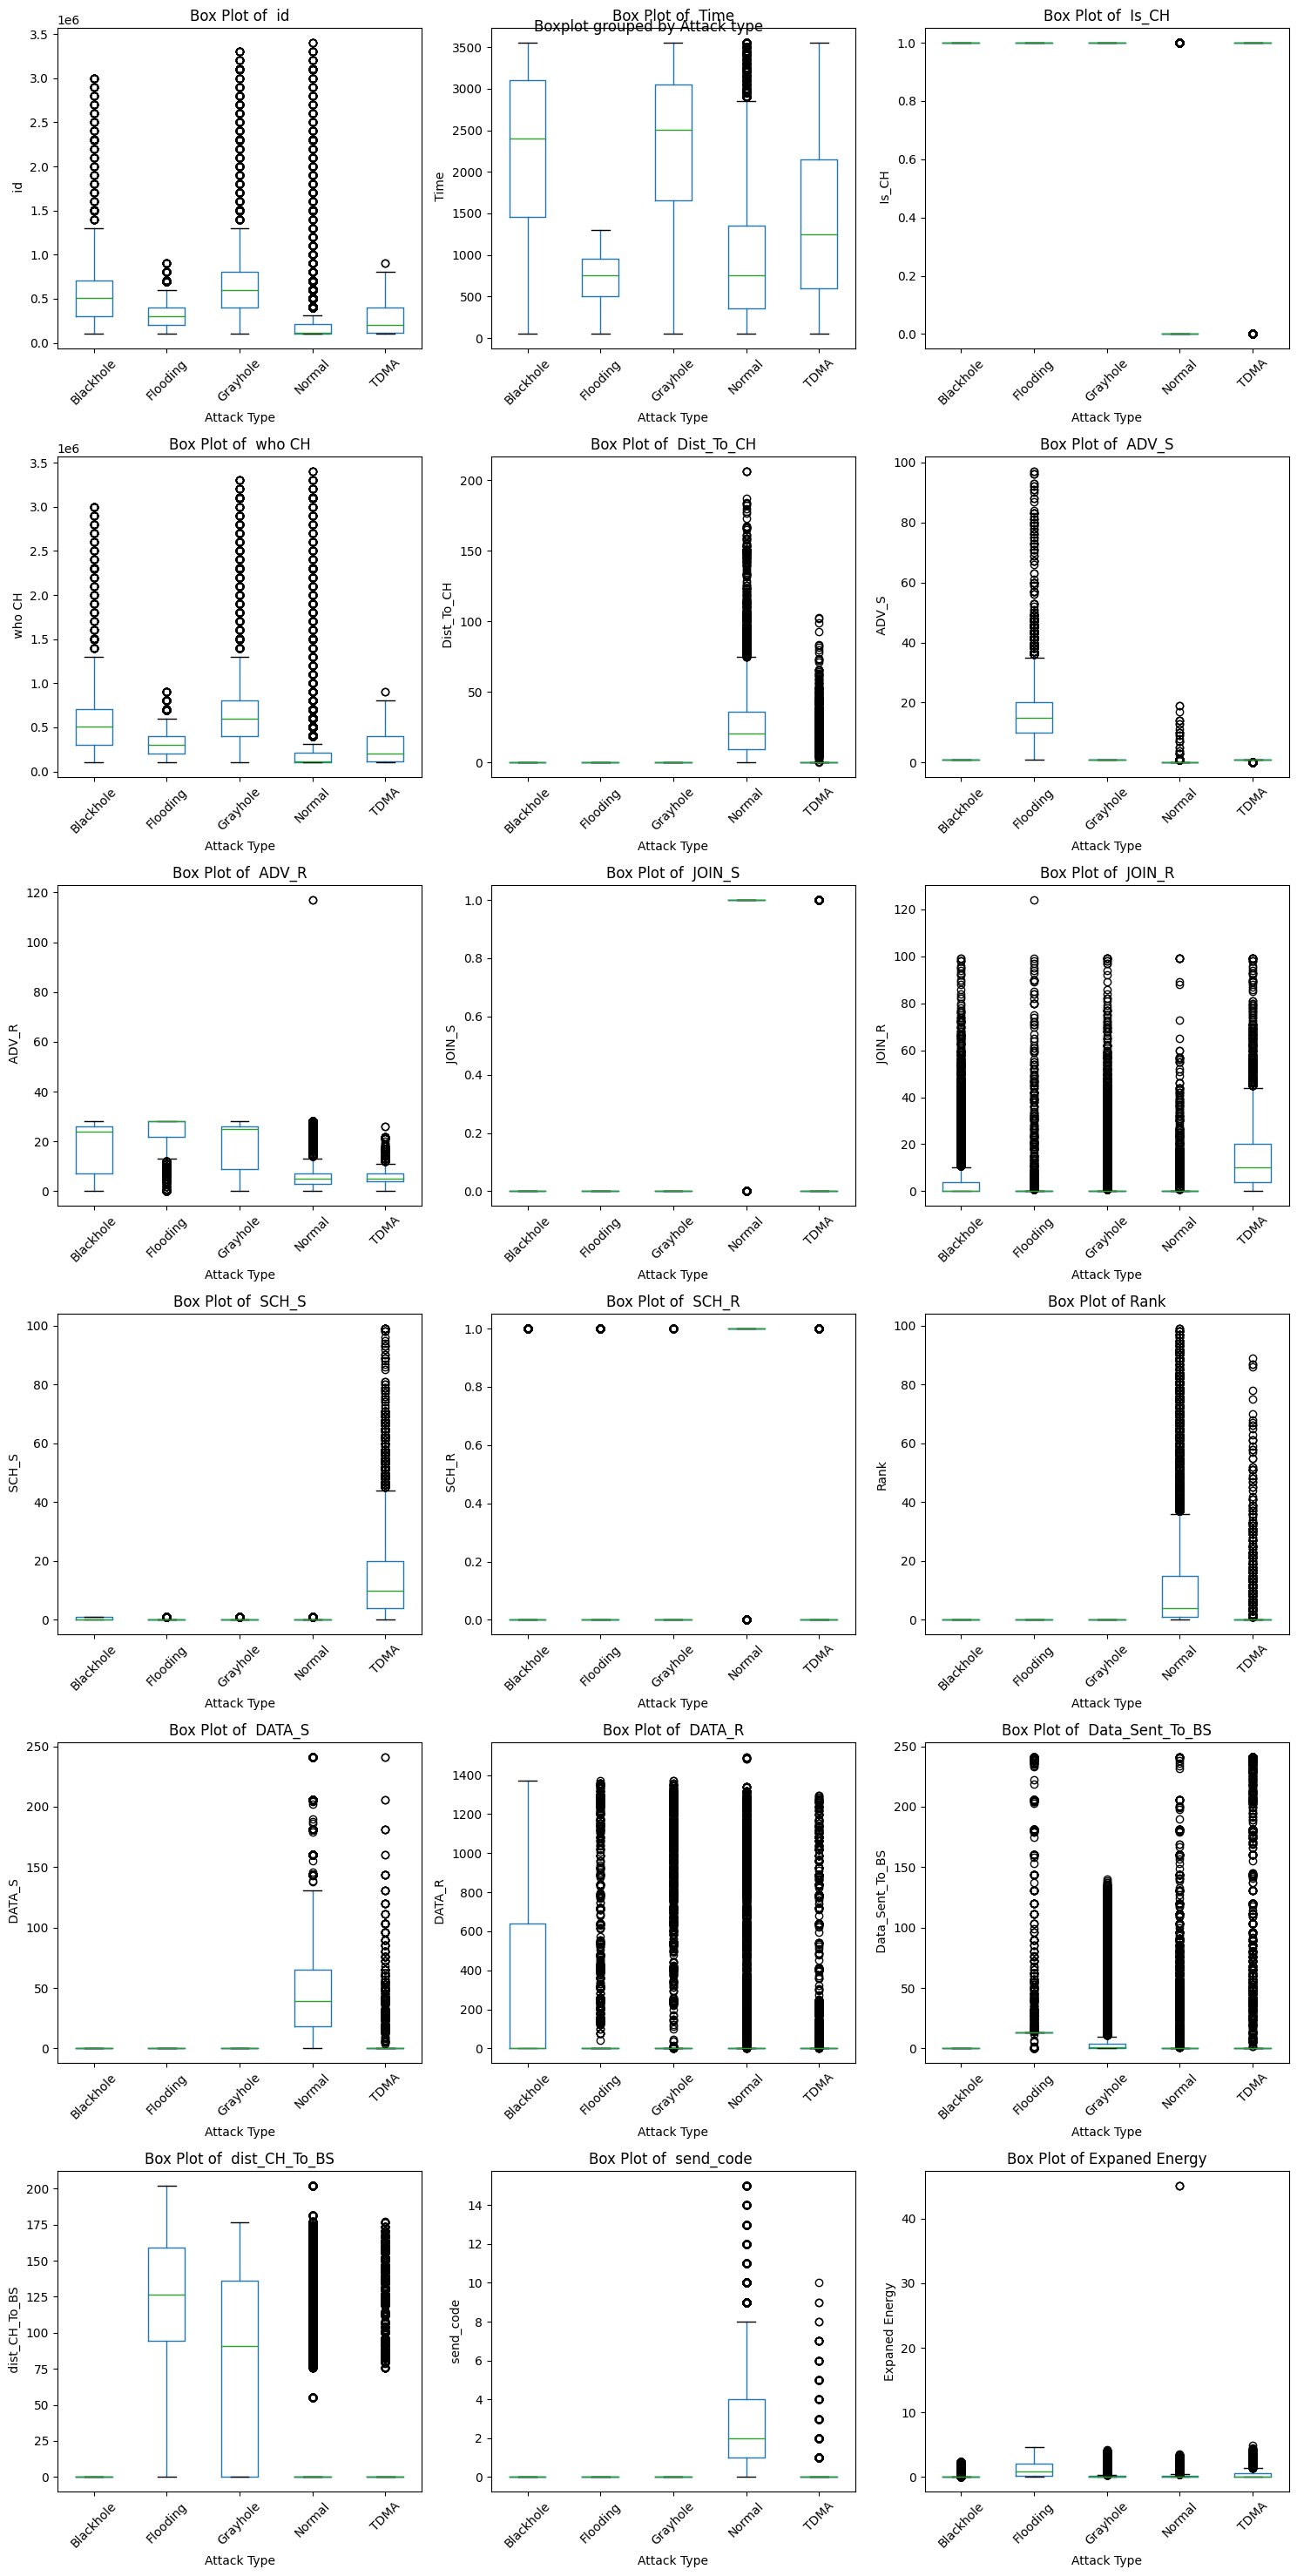

In [58]:
import matplotlib.pyplot as plt

numerical_columns = df_balanced.select_dtypes(include=['number']).columns

# Determine the number of plots (rows and columns)
num_columns = len(numerical_columns)
n_cols = 3
n_rows = (num_columns + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten axes to iterate easily (in case we have more than 1 row)
axes = axes.flatten()

for i, numerical_column in enumerate(numerical_columns):
    df_balanced.boxplot(column=numerical_column, by='Attack type', ax=axes[i], grid=False)
    axes[i].set_title(f'Box Plot of {numerical_column}')
    axes[i].set_xlabel('Attack Type')
    axes[i].set_ylabel(numerical_column)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [62]:
file_path = ROOT_DIR+'\\data\\processed\\WSN-DS_balance.csv'
df_balanced.to_csv(file_path, index=False)